In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import pickle
from numpy import genfromtxt
import pandas as pd
from joblib import Parallel, delayed
import multiprocessing as mp
import scipy.io
from tqdm import tqdm_notebook as tqdm
import h5py
import math

In [2]:
import sys
from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.benchmarks.power_two_sample import power, power_given_data
from mgcpy.benchmarks.simulations import *
from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.hhg import HHG
from mgcpy.independence_tests.kendall_spearman import KendallSpearman

In [3]:
simulations = {'sine_4pi': (sin_sim, 12), 'sine_16pi': (sin_sim, 13), 'multi_noise': (multi_noise_sim, 19),
               'circle': (circle_sim, 16), 'ellipse': (circle_sim, 17), 'diamond': (square_sim, 18),
               'log': (log_sim, 10), 'two_parabolas': (two_parab_sim, 15), 'fourth_root': (root_sim, 11),
               'multi_indept': (multi_indep_sim, 20), 'bernoulli': (ubern_sim, 9), 'square': (square_sim, 14)}

In [4]:
def power_vs_dimension_parallel(params_dict):
    dims = [1, 3, 5, 7, 9, 10]
    estimated_power = np.zeros(len(dims))
    test = params_dict['independence_test']
    sim = params_dict['simulation_type']
    print(sim, test.get_name())
    
    for i in range(len(dims)):
        estimated_power[i] = power_given_data(test, sim, data_type='dimension', num_samples=100, num_dimensions=dims[i], theta=0)
    
    np.savetxt('{}_{}_dimension_matlab_new.csv'.format(sim, test.get_name()), estimated_power, delimiter=',')
    print('{} {} finished'.format(sim, test.get_name()))
    return (params_dict, estimated_power)

In [5]:
def fill_params_dict_list_dim():
    mcorr = DCorr(which_test='unbiased')
    dcorr = DCorr(which_test='biased')
    mantel = DCorr(which_test='mantel')
    mgc = MGC()
    pearson = RVCorr(which_test='pearson')
    rv_corr = RVCorr(which_test='rv')
    cca = RVCorr(which_test='cca')
    independence_tests = [mcorr, dcorr, mantel, mgc, pearson, rv_corr, cca]
    
    params_dict_list = []
    for sim_name, sim_func in simulations.items():
        for test in independence_tests:
            params_dict = {'independence_test': test, 'simulation_type': sim_func[1]}
            params_dict_list.append(params_dict)
    return params_dict_list

In [6]:
%%time
params_dict = fill_params_dict_list_dim()
print(type(params_dict))
pool = mp.Pool(mp.cpu_count()-1)
results = pool.map(power_vs_dimension_parallel, params_dict)

<class 'list'>
13 unbiased
19 unbiased
12 unbiased
13 unbiased finished
13 biased
19 unbiased finished
19 biased
12 unbiased finished
12 biased
13 biased finished
13 mantel
19 biased finished
19 mantel
12 biased finished
12 mantel
13 mantel finished
13 mgc
19 mantel finished
19 mgc
12 mantel finished
12 mgc
12 mgc finished
12 pearson
12 pearson finished
12 rv
19 mgc finished
19 pearson
13 mgc finished
13 pearson
12 rv finished
12 cca
19 pearson finished
19 rv
13 pearson finished
13 rv
12 cca finished
16 unbiased
19 rv finished
19 cca
13 rv finished
13 cca
19 cca finished
17 unbiased
13 cca finished
18 unbiased
16 unbiased finished
16 biased
17 unbiased finished
17 biased
18 unbiased finished
18 biased
16 biased finished
16 mantel
17 biased finished
17 mantel
18 biased finished
18 mantel
16 mantel finished
16 mgc
17 mantel finished
17 mgc
18 mantel finished
18 mgc
17 mgc finished
17 pearson
17 pearson finished
17 rv
17 rv finished
17 cca
18 mgc finished
18 pearson
16 mgc finished
16 pea

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


10 unbiased finished
10 biased
11 unbiased finished
11 biased
15 unbiased finished
15 biased
10 biased finished
10 mantel
11 biased finished
11 mantel
15 biased finished
15 mantel
10 mantel finished
10 mgc
11 mantel finished
11 mgc
15 mantel finished
15 mgc


/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

10 mgc finished
10 pearson


/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

10 pearson finished
10 rv


/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

10 rv finished
10 cca


/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

15 mgc finished
15 pearson


/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


10 cca finished
20 unbiased


/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

15 pearson finished
15 rv


/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

15 rv finished
15 cca


/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

15 cca finished
9 unbiased


/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:590: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
/anaconda3

11 mgc finished
11 pearson


/anaconda3/lib/python3.7/site-packages/mgcpy-0.1.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/benchmarks/power_two_sample.py:146: ComplexWarning: Casting complex values to real discards the imaginary part
  mat_X, permuted_y)
/anaconda3/lib/python3.7/site-packages/mgcpy-0.1.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/benchmarks/power_two_sample.py:148: ComplexWarning: Casting complex values to real discards the imaginary part
  mat_X, mat_Y)


11 pearson finished
11 rv
11 rv finished
11 cca
11 cca finished
14 unbiased
20 unbiased finished
20 biased
9 unbiased finished
9 biased
14 unbiased finished
14 biased
20 biased finished
20 mantel
9 biased finished
9 mantel
14 biased finished
14 mantel
20 mantel finished
20 mgc
9 mantel finished
9 mgc
14 mantel finished
14 mgc
20 mgc finished
20 pearson
20 pearson finished
20 rv
20 rv finished
20 cca
9 mgc finished
9 pearson
20 cca finished
9 pearson finished
9 rv
9 rv finished
9 cca
9 cca finished
14 mgc finished
14 pearson
14 pearson finished
14 rv
14 rv finished
14 cca
14 cca finished
CPU times: user 19.8 s, sys: 6.99 s, total: 26.8 s
Wall time: 8h 6min 13s


In [7]:
def plot_all_curves():
    simulation_names = ['linear', 'exponential', 'cubic','joint_normal', 'step', 'quadratic', 'w_shape', 'spiral', 
                         'bernoulli', 'log', 'fourth_root', 'sine_4pi',
                       'sine_16pi', 'square', 'two_parabolas', 'circle', 'ellipse', 'diamond', 'multi_noise',
                        'multi_indept']
        
        
    fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(14,12))  
    simulation_type = 0
    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            sim_name = simulation_names[simulation_type]
            simulation_type += 1
            tests = ['mgc', 'unbiased', 'biased', 'mantel', 'pearson', 'rv', 'cca']
            #mgc_power = np.genfromtxt('{}_mgc_angle_matlab_new.csv'.format(simulation_type), delimiter=',')

            for test in tests:
                power = np.genfromtxt('{}_{}_dimension_matlab_new.csv'.format(simulation_type, test), delimiter=',')
                x_axis = [1,3,5,7,9,10]
                col.plot(x_axis, power, label=test)
                col.set_ylim(-0.25, 1.25)
                col.set_yticks([-0.25, 0, 0.25, 0.50, 0.75, 1.00])
                col.set_title(sim_name) 
    plt.legend()
    plt.subplots_adjust(hspace=.75)
    fig.suptitle('Power of Changing Angle')
    plt.savefig('power_curves_dimension_new')

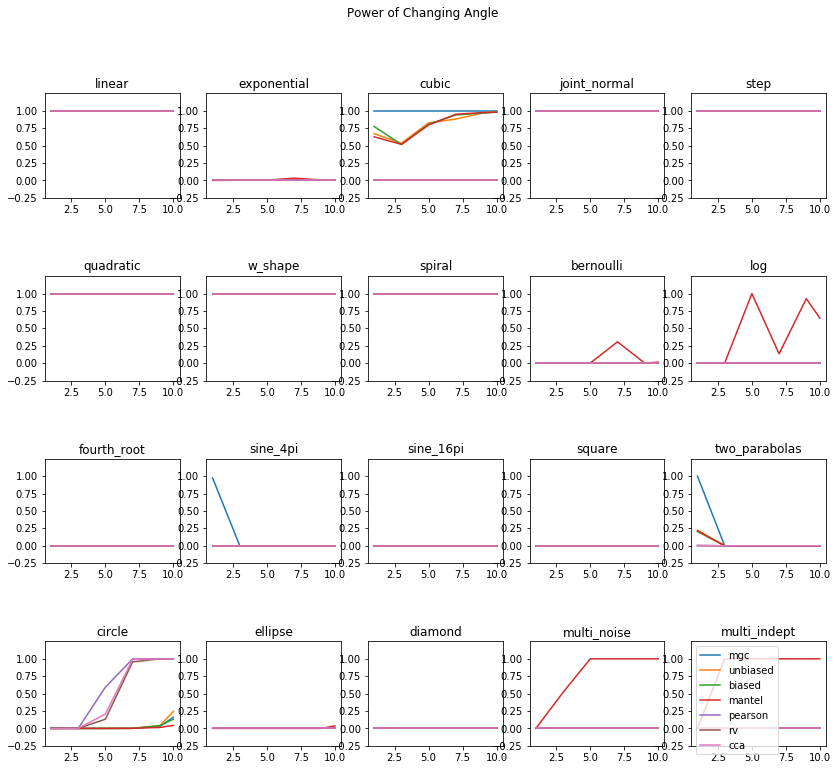

In [8]:
plot_all_curves()